<a href="https://colab.research.google.com/github/aypy01/scikit-learn/blob/main/heart_disease_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Risk Prediction using Machine Learning

Welcome to this beginner-friendly end-to-end machine learning project where you’ll build a **Heart Disease Risk Predictor** using real-world health data from the **heart.csv**.

---



## What You’ll Learn

In this project, you’ll walk through the **entire machine learning pipeline**  from raw CSV to intelligent prediction:

###  1. Data Understanding & Cleaning
- Load medical data using `pandas`
- Handle missing values, outliers, and irrelevant features
- Make decisions like **dropping columns** (e.g., `education`) that don’t directly contribute to model performance

###  2. Data Preprocessing
- Encode categorical values (e.g., Male/Female, Yes/No)
- Feature scaling using `StandardScaler`
- Train-test splitting for fair evaluation

###  3. Model Training & Comparison
- Train multiple classification models:
  - Logistic Regression
  - KNN
  - Decision Tree
  - Random Forest
  - SVM, etc.
- Evaluate them using:
  - Accuracy
  - Precision
  - Recall
  - F1-Score

###  4. Model Selection & Saving
- Automatically select the best model based on metrics
- Save it using `pickle` for future use
- Save the associated scaler object for consistent input formatting

###  5. Building a Real-Time Predictor
- Testing the trained model + scaler to make live predictions
- Add fun, humorous terminal messages to make it feel interactive

---




##  Final Output

At the end of this project, you’ll have:

- A trained and saved Machine Learning model (`best_model.pkl` and `scaler.pkl`)
using the saved model
- Confidence working with `pandas`, `scikit-learn`,`matplotlib` and deploying ML models
- Insights into which health features influence **heart disease** risk the most



---



## Dataset Information
This notebook uses the "Heart Disease Dataset" from Kaggle.
Download link
[download ](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

The dataset is downloaded using kagglehub, which handles
automatic fetching and local storage.

##Importing Libraries

In [343]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split


## Loading the Dataset

The dataset is loaded from a CSV file using `pd.read_csv()` and stored in a variable called `dataset`.


In [344]:
# dataset= Data frame , a common variable to define a variable in pandas
dataset = pd.read_csv("heart.csv")
dataset.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [315]:
# Show the shape of the dataset: (rows, columns)
dataset.shape

# We'll see the missing values next (e.g., by filling or dropping them)

(1025, 14)

## Checking for Missing Values

We inspect null (missing) values in the dataset using `dataset.isnull().sum()`:

- `dataset.isnull().sum()`  
  → Returns the count of nulls in each column.

- `dataset.isnull().sum().to_frame().T`  
  → Converts the null counts into a DataFrame and transposes it to show column names horizontally for compact viewing.

- `dataset.shape`  
  → Displays the number of rows and columns in the dataset as `(rows, columns)`.


After identifying missing values, we plan to handle them appropriately in the next step.


In [316]:
# Display number of missing values in each column
print("Missing values per column:")
dataset.isnull().sum().to_frame().T

#It looks very balanced dataset

Missing values per column:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Train-Test Split

We prepare the dataset for training by:

- **Separating features and target**:
  - Drop `Target` (the target column)  (excluded from modeling).
- **Splitting the data**:
  - 80% of the data is used for training, and 20% for testing.
  - `shuffle=True` ensures random distribution.
  - `random_state=42` keeps the split reproducible across runs.


In [317]:
# Split the balanced dataset into features (X) and target (y)
# Dropping 'target' column as it's target
X = dataset.drop(columns=[ "target"]).values #This drops only target and making every other column as feature
y = dataset["target"].values #Making y target

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,                #feature
    y,                #Target
    train_size=0.8,   #remaing 0.2 is test set
    random_state=42,  # For consistent results
    shuffle=True      # Ensure data is randomly shuffled before splitting
)


## Data Preprocessing

We apply feature scaling to normalize the dataset:

- **StandardScaler** is used to scale the data to have zero mean and unit variance.
- **QuantileTransformer** was tested as an alternative  it maps the features to a normal distribution, reducing the influence of outliers.



```
Scaler or QuantieTranformer are’t always needed
eg: tree models like RandomForest work fine without Scaling
but it helps models sensitive to feature magnitude
(e.g., Logistic Regression, SVM) learn better and generalize well.

```



In [318]:
# Import preprocessing tools
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [319]:
# Initialize StandardScaler for normalization (zero mean, unit variance)
scaler = StandardScaler()

# Apply StandardScaler: fit on training, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# QuantileTransformer was tested but not used due to risk of overfitting
# It smooths outliers, but may distort the feature distribution too much on small datasets


## (Optional) Testing QuantileTransformer

This block was used to test how `QuantileTransformer` affects the data.

- It transforms features to follow a normal distribution.
- Good for handling skewed data or reducing the impact of outliers.

However, the transformed values may **distort original feature relationships**, potentially leading to **overfitting** — especially in small or sensitive datasets.

> As a result, this approach was not used in the final model.


In [320]:
# Also initialize QuantileTransformer for comparison
# It transforms features to follow a normal distribution and reduces the effect of outliers
qt = QuantileTransformer(output_distribution="normal")

In [321]:
X_train_qt=qt.fit_transform(X_train)
X_test__qt=qt.transform(X_test)

print(f'Quantile Scaler Train: {pd.DataFrame(X_train_qt)}')
print(f'Quantile Scale Test: {pd.DataFrame(X_test__qt)}')

Quantile Scaler Train:            0         1         2         3         4         5         6   \
0   -0.578567  5.199338  0.777068 -0.882902 -2.231606 -5.199338 -5.199338   
1    1.007286 -5.199338 -5.199338  2.290747  1.577093 -5.199338  0.645003   
2   -0.144348 -5.199338  0.777068 -1.621054  0.523347 -5.199338 -5.199338   
3    0.471389  5.199338 -5.199338  0.288592 -0.116566 -5.199338  0.645003   
4   -0.445889  5.199338  0.777068 -0.319042  0.101172  5.199338 -5.199338   
..        ...       ...       ...       ...       ...       ...       ...   
815 -1.353725  5.199338  0.777068  0.001530 -0.567746 -5.199338 -5.199338   
816  0.683160  5.199338 -5.199338  0.620698 -0.754499 -5.199338 -5.199338   
817 -0.445889  5.199338 -5.199338  0.620698  1.070280 -5.199338  0.645003   
818 -1.078456  5.199338 -5.199338 -1.309172 -0.667781 -5.199338  0.645003   
819 -0.340046  5.199338 -5.199338 -1.059489 -0.234744 -5.199338  0.645003   

           7         8         9         10        1

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (820). n_quantiles is set to n_samples.
  warnings.warn(


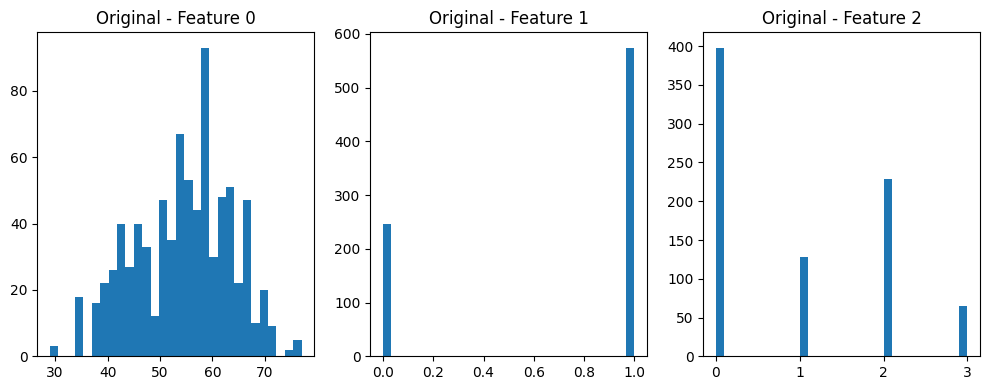

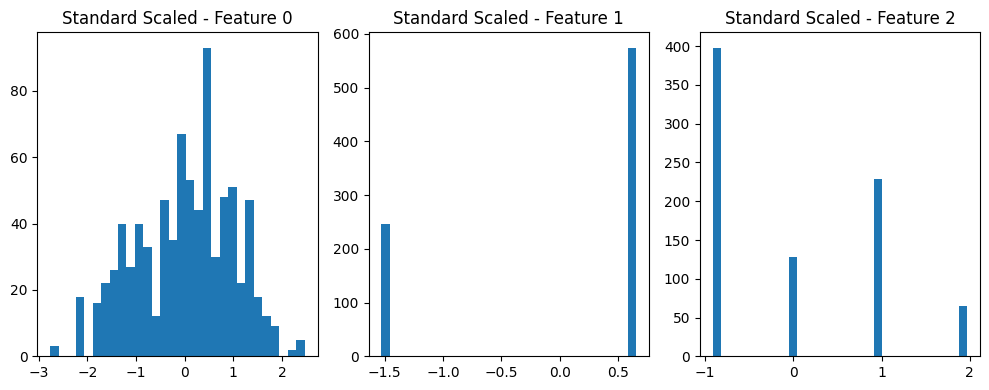

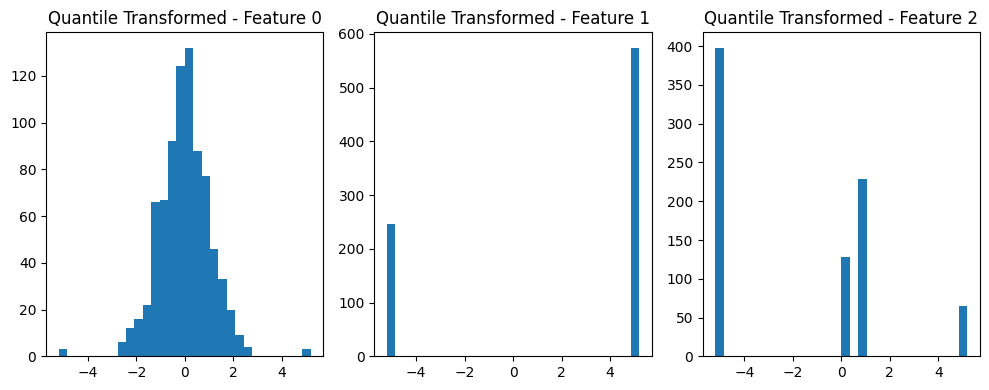

In [322]:
# Matplotlib (for visualization)
# This section is used to visually compare the effect of different scalers (StandardScaler vs. QuantileTransformer)
import matplotlib.pyplot as plt


# Function to plot distributions of the first 3 features
def plot_feature_dist(X, title):
    plt.figure(figsize=(10, 4))
    for i in range(3):  # Plot first 3 features only
        plt.subplot(1, 3, i + 1)
        plt.hist(X[:, i], bins=30)
        plt.title(f"{title} - Feature {i}")
    plt.tight_layout()
    plt.show()

# Visual comparisons:
plot_feature_dist(X_train, "Original")
plot_feature_dist(X_train_scaled, "Standard Scaled")
plot_feature_dist(X_train_qt, "Quantile Transformed")



## Model & Metric Imports

This section loads various classification models and evaluation metrics:

###  Models:
- **Logistic Regression**: Linear classifier
- **K-Nearest Neighbors**
- **Decision Tree**
- **Random Forest**
- **AdaBoost**, **Gradient Boosting**
- **Support Vector Classifier (SVC)**
- **XGBoost Classifier**
- **Gaussian Naive Bayes**

### Evaluation Metrics:
- `accuracy_score`: Measures overall correctness
- `precision_score`: Measures correctness for the positive class
- `confusion_matrix`: Shows actual vs. predicted values
- `classification_report`: Summary of precision, recall, and F1-score

> **Clarification:**  
> Metrics do **not** give weights to features.  
> They are only used to evaluate the performance of trained models.


In [323]:
# Metrics :evaluate model performance on predicted vs. actual values.
# Importing the Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [324]:
# Defining the list of classifiers so that thhey can be passed at same time
# The purpose is to stream line and comapre different acuracy by individual models
# Then selecting the optimal
classifier_models = [
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    AdaBoostClassifier(algorithm="SAMME"),  # the alrithm in adaboost by default is SAMME but defining it doest show the error
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    XGBClassifier(),
    GaussianNB(),
]


## Defining Classifiers for Batch Evaluation

We define a list of classification models that will be trained and tested in a loop. This allows:

- Easier model comparison
- Streamlined evaluation of performance (e.g., accuracy, precision)
- Selection of the most effective model for the task

> **Note:**  
> `algorithm="SAMME"` is explicitly set in `AdaBoostClassifier`, although it’s the default. This avoids ambiguity and improves readability.

An empty list is also prepared (in the next step) to store evaluation results from each model.



Each model is trained and evaluated in a single loop:

- **Training**: `.fit()` is called on the scaled training data.
- **Prediction**: `.predict()` is used on the test set.
- **Metrics Logged**:
  - **Accuracy**: Overall correctness.
  - **Precision**: How many predicted positives are actually positive.
  - **Classification Report**: Includes precision, recall, and F1-score.
  - **Confusion Matrix**: Breakdown of TP, FP, TN, FN.

### Terminal Formatting (Optional):
- Classifier names are printed in **green** using ANSI escape codes for visual clarity.
- Symbols (`"v"*50`, `"^"*50`) create clear separators in the console output.

Finally, results are stored in `results_list` for later comparison.


In [338]:
# Train and Evaluate each Calassifier
# # Creating empty list so then can be append the individual data here
results_list = []

# Train and Predict each classifier
for clf in classifier_models:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train) #This is scaled X train
    y_prediction = clf.predict(X_test_scaled)
    ##Note:
    #Scaling y_train would be wrong unless you’re doing regression with a model that needs target scaling

    # For Terminal result printing
    # Visual separator for model name output
    print("v" * 50)

    # Print the classifier name in green for emphasis, then reset color
    print(f'\033[92m{clf_name}\033[0m')  # \033[92m = green text, \033[0m = reset

    print("^" * 50)
    print()  # Blank line for spacing

    # To calculate the accuracy:
    accuracy = accuracy_score(y_test, y_prediction)
    print(f'{clf_name} accuracy: {accuracy}')
    print("=" * 60)

    # For Precision
    precision = precision_score(y_test, y_prediction, average="binary")
    print(f'{clf_name} precision: {precision}')
    print("=" * 50)

    #Classification report
    print(f'Classification Report For: {clf_name}')
    print(f'{classification_report(y_test, y_prediction)}')
    print("=" * 50)

    # Confusion Matrix:

    #print(f'Confusion Matrix For: {clf_name}')
    #print(f'{confusion_matrix(y_test, y_prediction)}')
    #print("=" * 50)



vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
RandomForestClassifier
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

RandomForestClassifier accuracy: 0.9853658536585366
RandomForestClassifier precision: 1.0
Classification Report For: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
LogisticRegression
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

LogisticRegression accuracy: 0.7951219512195122
LogisticRegression precision: 0.7563025210084033
Classification Report For: LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
AdaBoostClassifier
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

AdaBoostClassifier accuracy: 0.8146341463414634
AdaBoostClassifier precision: 0.7927927927927928
Classification Report For: AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       102
           1       0.79      0.85      0.82       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
GradientBoostingClassifier
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GradientBoostingClassifier accuracy: 0.9317073170731708
GradientBoostingClassifier precision: 0.9158878504672897
Classification Report For: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       102
  

## Evaluating Model Performance

Each model is evaluated using multiple metrics:

- `accuracy_score()`: Overall correctness of predictions.
- `classification_report()`: Provides precision, recall, and F1-score.
  - `output_dict=True` allows us to extract specific values from the result.
  - We use the **weighted average** values to account for class imbalance.

The results are stored in a list of dictionaries (`results_list`) for organized comparison across all models.


## Model Rankings

After compiling all evaluation metrics into the `result` DataFrame:

- The entire DataFrame is printed with **green terminal text formatting** for visual clarity.
- The model with the **highest accuracy** is selected from the top of the sorted DataFrame.


##  Displaying Best Model

Once the best model name (`best_model`) is identified from the results DataFrame, we need to match it with the actual trained model object from the list of classifiers.

This is done using a loop:

In [339]:
# Match the name with the actual trained model instance
for clf in classifier_models:
    best_model = clf
    break

print("+"*80)
print(f'\033[92m     Best Model is : {best_model}\033[0m')
print("+"*80)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
     Best Model is : RandomForestClassifier()
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [340]:
#To check the type
print(type(best_model)) #Now best model is a classfier
print(type(scaler))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.preprocessing._data.StandardScaler'>


##Saving Best Model

In [341]:
import pickle


pickle.dump(best_model, open(r"best_model.pkl", "wb"))
pickle.dump(scaler, open(r"scaler.pkl", "wb"))


##Importing the saved model

In [342]:
with open(r'best_model.pkl','rb')as file:
    model=pickle.load(file)


##Testing the Model

###Test-1

In [331]:
#Artififial test parameters
case_hd = np.array([[59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]])
#respective labels:age, sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target

# Use the loaded best/our best model for predictions
test_prediction = model.predict(case_hd)[0]

if test_prediction==0:
  print( f' Patient has NO Heart Problem')
else:
  print( f' Patient Has Heart Problem')
#print(f"HD case prediction: {pred_hd} (1 = Heart Disease, 0 = No)")


 Patient Has Heart Problem


###Test-2

In [332]:
#respective labels:age, sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
case_no_hd = np.array([[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]]) # No heart disease

test_prediction1 = model.predict(case_no_hd)[0]

if test_prediction1==0:
  print( f' Patient has NO Heart Problem')
else:
  print( f' Patient Has Heart Problem')

 Patient has NO Heart Problem


##Final Notes:

- Unrealistic/extreme inputs cause unstable predictions; realistic values give consistent results.
Inconsistent outputs were due to random splits without a fixed seed.

- Dataset imbalance needs stratified splitting or resampling.

- Saving models with pickle ensures correct loading and reuse.

- Preprocessing (e.g., scaling) generally improves stability and performance.

- Achieved accuracy 98% without overfitting.

- Balanced data, realistic inputs, reproducibility, and preprocessing are key for reliable ML pipelines.

## Author
 <p align="left">
  Created and maintained by
  <a href="https://github.com/aypy01" target="_blank"> Aaditya Yadav</a>
  <a href="https://github.com/aypy01" target="_blank">
    <img src="https://img.shields.io/badge/aypy01-000000?style=flat-square&logo=github&logoColor=00FF80" alt="GitHub Badge"/>
  </a>
</p>

</p>
<p align="left">
  <img src="https://readme-typing-svg.demolab.com?font=Fira+Code&duration=3000&pause=500&color=00FF80&center=false&vCenter=false&width=440&lines=Break+Things+First%2C+Understand+Later;Built+to+Debug%2C+Not+Repeat;Learning+What+Actually+Sticks;Code.+Observe.+Refine." alt="Typing SVG" />
</p>

## License

This project is licensed under the [![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT).
